In [3]:
import pandas as pd
import numpy as np
import requests as rq
import bs4 as bs4
import re
import json
import tqdm
import time

In [151]:
pages = list(range(1, 23))
url = 'https://filmow.com/usuario/liviaandretti/avaliacoes/?pagina={page}'

In [201]:
pbar = tqdm.tqdm(total=100)
with open('parsed_filmow.json', 'w+') as output:
    data = dict()
    for page in pages:
        urll = url.format(page=page)
        response = rq.get(urll)
        parsed = bs4.BeautifulSoup(response.text)
        movies = parsed.find_all('li', attrs={'class':re.compile(r'movie_list_item')})
        
        for movie in movies:
            colname = "_".join(movie['class'])
            data[colname] = movie.text.strip()

            userRating = movie.find('span', attrs={'class': 'tip star-rating star-rating-small stars'})
            data['userRate'] = userRating['title']

            movieLink = movie.find('a')
            link = 'https://filmow.com' + movieLink['href'] + 'ficha-tecnica/'
            data['movieLink'] = link
            data['movie_pk'] = movieLink['data-movie-pk']
            
            movie_rq = rq.get(link)
            movie_parsed = bs4.BeautifulSoup(movie_rq.text)
            while movie_parsed.find('span', attrs={'class': 'cf-error-code'}) != None:
                time.sleep(5)
                movie_rq = rq.get(link)
                movie_parsed = bs4.BeautifulSoup(movie_rq.text)
            
            data['nofRates'] = int(movie_parsed.find('span', attrs={'class': 'votes'}).text)
            data['movieInfo'] = movie_parsed.find('table', attrs={'class': 'table table-striped'}).text
            data['moviePeople'] = movie_parsed.find('div', attrs={'class': 'movie-resume-infos'}).text
            
            output.write('{}\n'.format(json.dumps(data)))
            pbar.update(100/len(pages)/20)

pbar.close()



  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

  0%|▏                                                                | 0.2272727272727273/100 [00:01<14:04,  8.47s/it]

  0%|▎                                                                | 0.4545454545454546/100 [00:02<11:31,  6.95s/it]

  1%|▍                                                                | 0.6818181818181819/100 [00:03<10:23,  6.28s/it]

  1%|▌                                                                | 0.9090909090909092/100 [00:04<08:59,  5.45s/it]

  1%|▋                                                                | 1.1363636363636365/100 [00:05<08:36,  5.23s/it]

  1%|▉                                                                | 1.3636363636363638/100 [00:06<07:47,  4.74s/it]

  2%|█                                                                 | 1.590909090909091/100 [00:07<07:13,  4.40s/it]

  2%|█▏                       

 30%|████████████████████▍                                              | 30.4545454545454/100 [01:58<04:07,  3.55s/it]

 31%|███████████████████▉                                             | 30.681818181818127/100 [01:59<03:50,  3.32s/it]

 31%|████████████████████                                             | 30.909090909090853/100 [02:00<03:46,  3.28s/it]

 31%|████████████████████▌                                             | 31.13636363636358/100 [02:01<03:56,  3.43s/it]

 31%|████████████████████▍                                            | 31.363636363636306/100 [02:01<03:49,  3.34s/it]

 32%|████████████████████▌                                            | 31.590909090909033/100 [02:02<03:59,  3.50s/it]

 32%|████████████████████▉                                             | 31.81818181818176/100 [02:03<04:08,  3.64s/it]

 32%|█████████████████████▏                                            | 32.04545454545449/100 [02:04<04:12,  3.72s/it]

 32%|█████████████████████▎     

 61%|████████████████████████████████████████▏                         | 60.90909090909077/100 [04:07<02:36,  3.99s/it]

 61%|████████████████████████████████████████▉                          | 61.1363636363635/100 [04:08<02:31,  3.91s/it]

 61%|███████████████████████████████████████▉                         | 61.363636363636225/100 [04:09<02:23,  3.72s/it]

 62%|████████████████████████████████████████▋                         | 61.59090909090895/100 [04:10<02:22,  3.70s/it]

 62%|████████████████████████████████████████▊                         | 61.81818181818168/100 [04:11<02:14,  3.53s/it]

 62%|████████████████████████████████████████▎                        | 62.045454545454405/100 [04:11<02:12,  3.49s/it]

 62%|█████████████████████████████████████████                         | 62.27272727272713/100 [04:12<02:23,  3.82s/it]

 62%|█████████████████████████████████████████▏                        | 62.49999999999986/100 [04:13<02:24,  3.86s/it]

 63%|███████████████████████████

 91%|██████████████████████████████████████████████████████████████▏     | 91.363636363637/100 [06:06<00:31,  3.62s/it]

 92%|████████████████████████████████████████████████████████████▍     | 91.59090909090973/100 [06:07<00:32,  3.89s/it]

 92%|████████████████████████████████████████████████████████████▌     | 91.81818181818247/100 [06:07<00:31,  3.89s/it]

 92%|█████████████████████████████████████████████████████████████▋     | 92.0454545454552/100 [06:08<00:30,  3.83s/it]

 92%|████████████████████████████████████████████████████████████▉     | 92.27272727272793/100 [06:09<00:29,  3.83s/it]

 93%|█████████████████████████████████████████████████████████████     | 92.50000000000067/100 [06:10<00:28,  3.84s/it]

 93%|██████████████████████████████████████████████████████████████▏    | 92.7272727272734/100 [06:11<00:26,  3.59s/it]

 93%|█████████████████████████████████████████████████████████████▎    | 92.95454545454614/100 [06:13<00:37,  5.36s/it]

 93%|███████████████████████████

# 1. Cleaning

In [46]:
df = pd.read_json('parsed_filmow.json', lines=True)
df = df.drop_duplicates()
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
index                    510 non-null int64
span2_movie_list_item    510 non-null object
userRate                 510 non-null object
movieLink                510 non-null object
movie_pk                 510 non-null int64
nofRates                 510 non-null int64
movieInfo                510 non-null object
moviePeople              510 non-null object
dtypes: int64(3), object(5)
memory usage: 32.0+ KB


In [47]:
def formatNofComment(y):
    if 'K' in y:
        y = y.replace('K', '')
        y = float(y.replace(',','.'))
        y = int(y*1000)
        return y
    else:
        return y

In [48]:
df['span2_movie_list_item'] = df['span2_movie_list_item'].str.replace('\n\n\n Assista Agora', '')
df[['Name','Rating','nofComments']] = df['span2_movie_list_item'].str.split('\n\n\n',expand=True)
df['userRate'] = df['userRate'].str.extract(r'(\d+\.?\d*)')

df['yearProd'] = df['movieInfo'].str.split('Ano produção').str[1].str.split('Dirigido por').str[0].str.replace('\n', '')
df['Director'] = df['movieInfo'].str.split('Dirigido por').str[1].str.split('Estreia').str[0].str.replace('\n', '')
df['Genre'] = df['movieInfo'].str.split('Gênero\n\n\n').str[1].str.split('\n\n\n\n\nPaíses de Origem').str[0].str.replace('\n', ',')
df['Country'] = df['movieInfo'].str.split('Países de Origem\n\n').str[1].str.split('\n\n\n').str[0].str.replace('\n', ',')
df['Debut'] = df['movieInfo'].str.split('Estreia').str[1].str.split('Outras datas').str[0].str.replace('\n', '')
df['Duration'] = df['movieInfo'].str.split('Duração').str[1].str.split('Classificação').str[0].str.replace('\n', '')

In [49]:
df['nofComments'] = df['nofComments'].map(formatNofComment)

In [50]:
df['nofComments'] = df['nofComments'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['userRate'] = df['userRate'].astype(float)
df['yearProd'] = df['yearProd'].astype(int)

df['Duration'] = df['Duration'].str.extract(r'(\d+)')
df['Duration'].fillna(0, inplace=True)
df['Duration'] = df['Duration'].astype(int)

In [51]:
x = df.Genre.str.split(r',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Genre');  
x = pd.get_dummies(x, prefix='g', columns=['Genre']).groupby(level=0).sum()

In [52]:
country_df = df.Country.str.split(r',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Country');  
country_df = pd.get_dummies(country_df, prefix='c', columns=['Country']).groupby(level=0).sum()
country_df.drop('c_', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019CF7547988>,
      dtype=object)

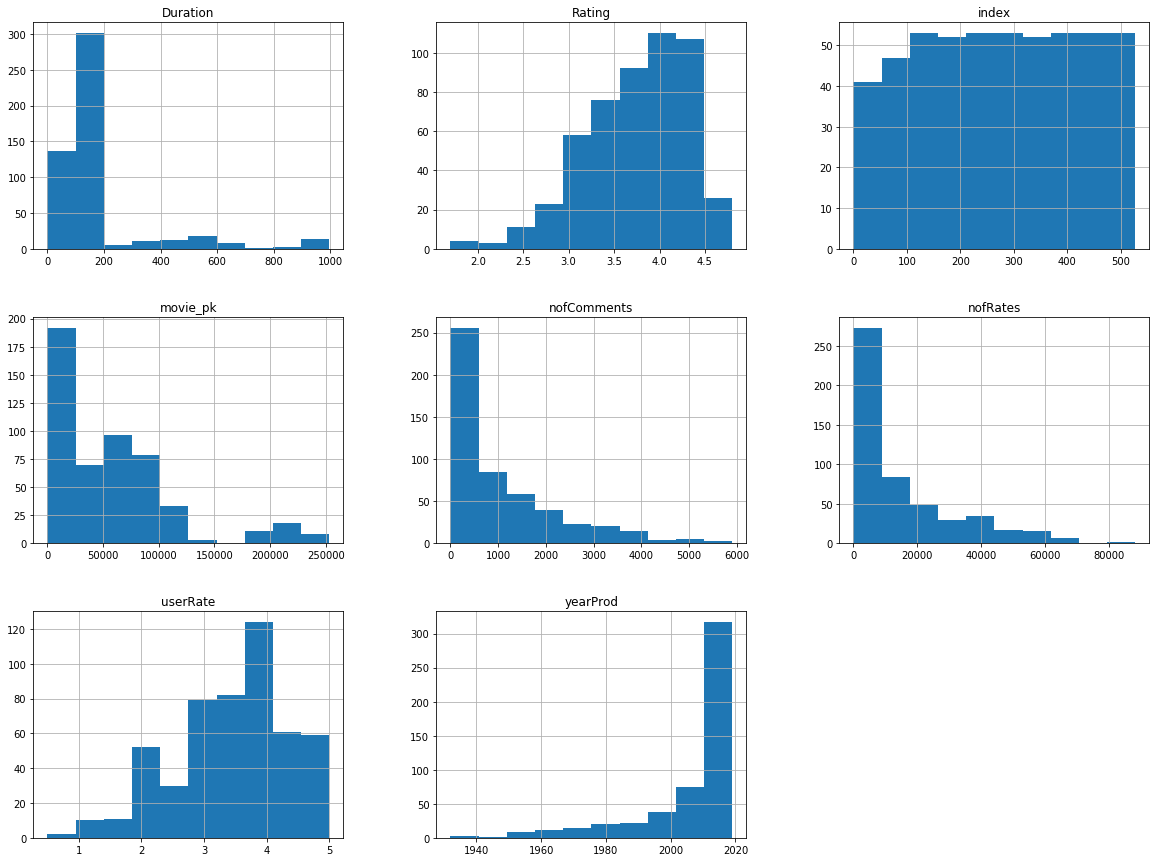

In [53]:
df.hist(figsize=(20,15))
# Rating, nofRates, nofComments to be normalized

In [54]:
df_ready = df.join(x)
df_ready = df_ready.join(country_df)
df_ready.head()

,index,span2_movie_list_item,userRate,movieLink,movie_pk,nofRates,movieInfo,moviePeople,Name,Rating,nofComments,yearProd,Director,Genre,Country,Debut,Duration,g_Animação,g_Aventura,g_Ação,g_Biografia,g_Comédia,g_Documentário,g_Drama,g_Esporte,g_Experimental,g_Família,g_Fantasia,g_Faroeste,g_Ficção Científica,g_Film-Noir,g_Guerra,g_História,g_Mistério,g_Musical,g_Música,g_Nacional,g_Policial,g_Romance,g_Super-herói,g_Suspense,g_Terror,g_Thriller,c_Alemanha,c_Argentina,c_Austrália,c_Brasil,c_Bélgica,c_Canadá,c_Chile,c_Coreia do Sul,c_Dinamarca,c_Emirados Árabes Unidos,c_Espanha,c_Estados Unidos da América,c_França,c_Hong Kong,c_Irlanda,c_Itália,c_Japão,c_Luxemburgo,c_México,c_Nova Zelândia (Aotearoa),c_Países Baixos (Holanda),c_Polônia,c_Reino Unido da Grã-Bretanha e Irlanda do Norte,c_República Checa,c_Suécia,c_Suíça,c_Venezuela,c_Índia
0,0,"Jojo Rabbit\n\n\n4.2\n\n\n1,5K",4.5,https://filmow.com/jojo-rabbit-t253138/ficha-t...,253138,15213,\n\nTítulo\n\nJojo Rabbit (Original)\n\n\n\nAn...,\n\nRoteiro\n\n\n\n\nTaika Waititi\n\n\n\nProd...,Jojo Rabbit,4.2,1500,2019,Taika Waititi,"Comédia,Drama,Guerra","Alemanha,Estados Unidos da América",6 de Fevereiro de 2020(Brasil),108,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,"Parasita\n\n\n4.5\n\n\n3,3K",5.0,https://filmow.com/parasita-t249146/ficha-tecn...,249146,32141,\n\nTítulo\n\n기생충 (Original)\n\n\n\nAno produç...,\n\nRoteiro\n\n\n\n\nBong Joon-ho\n\n\n\n\n\nH...,Parasita,4.5,3300,2019,Bong Joon-ho,"Comédia,Drama,Thriller",Coreia do Sul,7 de Novembro de 2019(Brasil),132,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,"Bacurau\n\n\n4.4\n\n\n2,5K",5.0,https://filmow.com/bacurau-t77658/ficha-tecnica/,77658,22035,\n\nTítulo\n\nBacurau (Original)\n\n\n\nAno pr...,\n\nRoteiro\n\n\n\n\nJuliano Dornelles\n\n\n\n...,Bacurau,4.4,2500,2019,Juliano DornellesKleber Mendonça Filho,"Ação,Aventura,Drama,Faroeste,Ficção Científica...","Brasil,França",29 de Agosto de 2019(Brasil),131,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Uma Vida Com Propósito\n\n\n3.5\n\n\n83,2.0,https://filmow.com/uma-vida-com-proposito-t204...,204135,739,\n\nTítulo\n\nI'm Not Ashamed (Original)\n\n\n...,\n\nRoteiro\n\n\n\n\nBodie Thoene\n\n\n\n\n\nK...,Uma Vida Com Propósito,3.5,83,2016,Brian Baugh,Drama,Estados Unidos da América,21 de Outubro de 2016(Mundial),112,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Com Quem Será?\n\n\n2.8\n\n\n105,1.5,https://filmow.com/com-quem-sera-t240627/ficha...,240627,666,\n\nTítulo\n\nDestination Wedding (Original)\n...,\n\nRoteiro\n\n\n\n\nVictor Levin\n\n\n\nProdu...,Com Quem Será?,2.8,105,2018,Victor Levin,"Comédia,Drama,Romance",Estados Unidos da América,21 de Março de 2019(Brasil),90,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 2. Data Investigation

In [27]:
import seaborn as sns

In [91]:
df_ready[['userRate', 'Rating', 'nofComments', 'nofRates']].describe()

,userRate,Rating,nofComments,nofRates
count,510.000000,510.000000,510.000000,510.000000
mean,3.521569,3.734510,1061.656863,14873.652941
std,1.006621,0.543243,1172.516903,17037.673351
min,0.500000,1.700000,6.000000,87.000000
25%,3.000000,3.400000,195.750000,2442.750000
50%,3.500000,3.800000,593.500000,7441.000000
75%,4.000000,4.200000,1500.000000,22499.000000
max,5.000000,4.800000,5900.000000,88350.000000


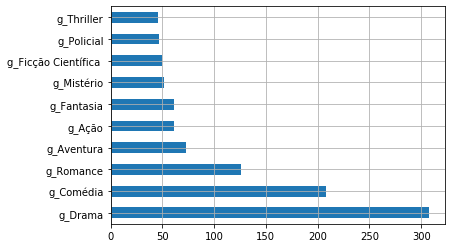

In [335]:
# TOP 10 movies' genre
x.sum().sort_values(ascending=False).head(10).plot.barh(grid=True)

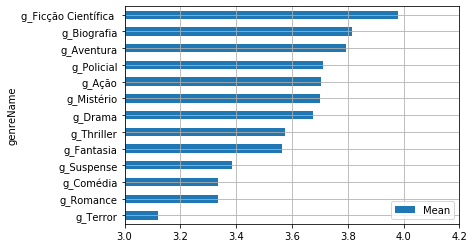

In [139]:
# Extracting user rate mean per Genre
genreName = []
qtt = []
sumRate = []
for col in x.columns:
    genreName = np.append(genreName, col)
    qtt = np.append(qtt, x[col].sum())
    sumRate = np.append(sumRate, df_ready[df_ready[col] == 1].userRate.sum())

data = {'genreName': genreName,
        'nofMovies': qtt,
        'userRateTotal': sumRate
        }

meanPerGenre = pd.DataFrame(data)
meanPerGenre['Mean'] = meanPerGenre['userRateTotal']/meanPerGenre['nofMovies']
meanPerGenre[meanPerGenre.nofMovies >= 30].sort_values(by='Mean').plot.barh(y='Mean', x='genreName', xlim=(3.0,4.2), grid= True)

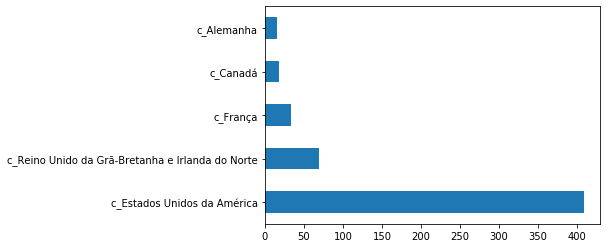

In [56]:
# TOP 5 movies' country
country_df.sum().sort_values(ascending=False).head(5).plot.barh()

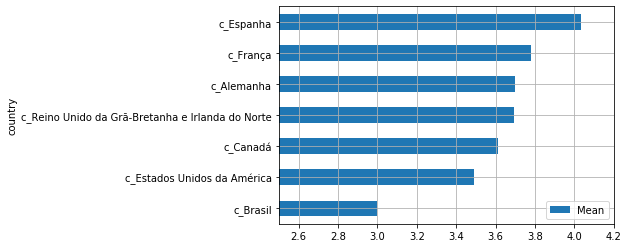

In [143]:
# Extracting user rate mean per country
country = []
qtt = []
sumRate = []
for col in country_df.columns:
    country = np.append(country, col)
    qtt = np.append(qtt, country_df[col].sum())
    sumRate = np.append(sumRate, df_ready[df_ready[col] == 1].userRate.sum())

data = {'country': country,
        'nofMovies': qtt,
        'userRateTotal': sumRate
        }

meanPerCount = pd.DataFrame(data)
meanPerCount['Mean'] = meanPerCount['userRateTotal']/meanPerCount['nofMovies']
meanPerCount[meanPerCount.nofMovies >= 10].sort_values(by='Mean').plot.barh(y='Mean', x='country', xlim=(2.5,4.2), grid= True)

In [158]:
df_ready[(df_ready['yearProd'] > 2010) & (df_ready['yearProd'] <= 2020)].count()['yearProd']

317

In [167]:
# first need to create a new column and store the year as datetimeindex
df_ready['<70s'] = np.where((df_ready['yearProd'] > 1800) & (df_ready['yearProd'] <= 1970), 1, 0)
df_ready['70s'] = np.where((df_ready['yearProd'] > 1970) & (df_ready['yearProd'] <= 1980), 1, 0)
df_ready['80s'] = np.where((df_ready['yearProd'] > 1980) & (df_ready['yearProd'] <= 1990), 1, 0)
df_ready['90s'] = np.where((df_ready['yearProd'] > 1990) & (df_ready['yearProd'] <= 2000), 1, 0)
df_ready['00s'] = np.where((df_ready['yearProd'] > 2000) & (df_ready['yearProd'] <= 2010), 1, 0)
df_ready['10s'] = np.where((df_ready['yearProd'] > 2010) & (df_ready['yearProd'] <= 2020), 1, 0)

In [172]:
def yearCat(row):
    if row.yearProd > 1800 and row.yearProd <= 1970:
        return '<70s'
    elif row.yearProd > 1970 and row.yearProd <= 1980:
        return '70s'
    elif row.yearProd > 1980 and row.yearProd <= 1990:
        return '80s'
    elif row.yearProd > 1990 and row.yearProd <= 2000:
        return '90s'
    elif row.yearProd > 2000 and row.yearProd <= 2010:
        return '00s'
    else:
        return '10s'

In [173]:
df_ready['yearCat'] = df_ready.apply(lambda x: yearCat(x),axis=1)

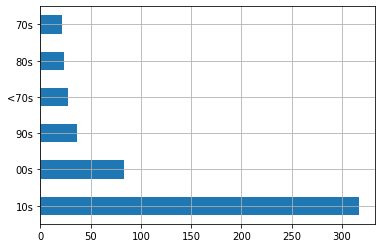

In [175]:
df_ready[df_ready.yearCat != ''].yearCat.value_counts().head(15).plot.barh(grid=True)

In [331]:
yearRate = df_ready.groupby('yearCat').agg({'yearCat':'size', 'userRate':'mean'}).rename(columns={'yearCat':'count','userRate':'mean'})
yearRate[yearRate['count'] >= 4].sort_values(by='mean', ascending=False)

,count,mean
yearCat,,
<70s,28,3.767857
90s,36,3.763889
70s,22,3.590909
10s,317,3.506309
00s,83,3.433735
80s,24,3.312500


In [332]:
df_ready[df_ready.yearCat == '80s']

,index,span2_movie_list_item,userRate,movieLink,movie_pk,nofRates,movieInfo,moviePeople,Name,Rating,nofComments,yearProd,Director,Genre,Country,Debut,Duration,g_Animação,g_Aventura,g_Ação,g_Biografia,g_Comédia,g_Documentário,g_Drama,g_Esporte,g_Experimental,g_Família,g_Fantasia,g_Faroeste,g_Ficção Científica,g_Film-Noir,g_Guerra,g_História,g_Mistério,g_Musical,g_Música,g_Nacional,g_Policial,g_Romance,g_Super-herói,g_Suspense,g_Terror,g_Thriller,c_Alemanha,c_Argentina,c_Austrália,c_Brasil,c_Bélgica,c_Canadá,c_Chile,c_Coreia do Sul,c_Dinamarca,c_Emirados Árabes Unidos,c_Espanha,c_Estados Unidos da América,c_França,c_Hong Kong,c_Irlanda,c_Itália,c_Japão,c_Luxemburgo,c_México,c_Nova Zelândia (Aotearoa),c_Países Baixos (Holanda),c_Polônia,c_Reino Unido da Grã-Bretanha e Irlanda do Norte,c_República Checa,c_Suécia,c_Suíça,c_Venezuela,c_Índia,<70s,70s,80s,90s,00s,10s,yearCat
123,141,"Conta Comigo\n\n\n4.4\n\n\n1,8K",4.0,https://filmow.com/conta-comigo-t1504/ficha-te...,1504,21245,\n\nTítulo\n\nStand by Me (Original)\n\n\n\nAn...,\n\nRoteiro\n\n\n\n\nBruce A. Evans\n\n\n\n\n\...,Conta Comigo,4.4,1800,1986,Rob Reiner,"Aventura,Drama",Estados Unidos da América,19 de Dezembro de 1986(Brasil),89,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80s
189,207,Wall Street - Poder e Cobiça\n\n\n3.7\n\n\n231,3.5,https://filmow.com/wall-street-poder-e-cobica-...,6538,4001,\n\nTítulo\n\nWall Street (Original)\n\n\n\nAn...,\n\nRoteiro\n\n\n\n\nOliver Stone\n\n\n\n\n\nS...,Wall Street - Poder e Cobiça,3.7,231,1987,Oliver Stone,"Drama,Policial",Estados Unidos da América,11 de Dezembro de 1987(Mundial),126,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80s
198,216,"Os Goonies\n\n\n4.1\n\n\n1,2K",3.0,https://filmow.com/os-goonies-t1669/ficha-tecn...,1669,18330,\n\nTítulo\n\nThe Goonies (Original)\n\n\n\nAn...,\n\nRoteiro\n\n\n\n\nChris Columbus\n\n\n\n\n\...,Os Goonies,4.1,1200,1985,Richard Donner,"Aventura,Comédia,Família",Estados Unidos da América,15 de Agosto de 1985(Brasil),114,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80s
213,231,Zelig\n\n\n4.2\n\n\n356,4.0,https://filmow.com/zelig-t3834/ficha-tecnica/,3834,4440,\n\nTítulo\n\nZelig (Original)\n\n\n\nAno prod...,\n\nRoteiro\n\n\n\n\nSanto Loquasto\n\n\n\n\n\...,Zelig,4.2,356,1983,Woody Allen,Comédia,Estados Unidos da América,1983(Brasil),79,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80s
215,233,Top Gun: Ases Indomáveis\n\n\n3.5\n\n\n696,3.0,https://filmow.com/top-gun-ases-indomaveis-t11...,1121,15323,\n\nTítulo\n\nTop Gun (Original)\n\n\n\nAno pr...,\n\nRoteiro\n\n\n\n\nEhud Yonay\n\n\n\n\n\nJac...,Top Gun: Ases Indomáveis,3.5,696,1986,Tony Scott,"Ação,Drama,Romance",Estados Unidos da América,10 de Julho de 1986(Brasil),110,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80s
237,255,"Clube dos Cinco\n\n\n4.2\n\n\n2,6K",4.0,https://filmow.com/clube-dos-cinco-t4673/ficha...,4673,48379,\n\nTítulo\n\nThe Breakfast Club (Original)\n\...,\n\nRoteiro\n\n\n\n\nJohn Hughes (I)\n\n\n\nPr...,Clube dos Cinco,4.2,2600,1985,John Hughes (I),"Comédia,Drama",Estados Unidos da América,5 de Junho de 1985(Brasil),97,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,80s
265,283,Tempo de Despertar\n\n\n4.3\n\n\n640,4.0,https://filmow.com/tempo-de-despertar-t6298/fi...,6298,7974,\n\nTítulo\n\nAwakenings (Original)\n\n\n\nAno...,\n\nRoteiro\n\n\n\n\nCynthia Flynt\n\n\n\n\n\n...,Tempo de Despertar,4.3,640,1990,Penny Marshall (I),Drama,Estados Unidos da América,1990(Brasil),121,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

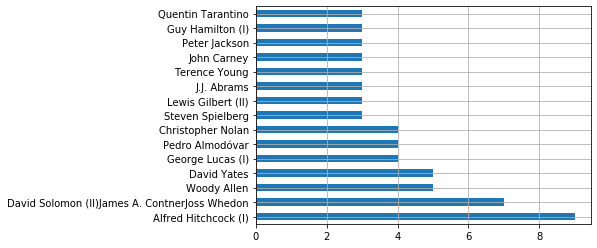

In [112]:
# Directors
df_ready[df_ready.Director != ''].Director.value_counts().head(15).plot.barh(grid=True)

In [137]:
# Mean for the movies of the top7 directors
dirRate = df_ready[df_ready.Director != ''].groupby('Director').agg({'Director':'size', 'userRate':'mean'}).rename(columns={'Director':'count','userRate':'mean'})
dirRate[dirRate['count'] >= 4].sort_values(by='mean', ascending=False)

,count,mean
Director,,
Pedro Almodóvar,4,4.625000
Christopher Nolan,4,4.500000
Woody Allen,5,4.100000
Alfred Hitchcock (I),9,4.000000
David Yates,5,3.900000
David Solomon (II)James A. ContnerJoss Whedon,7,3.785714
George Lucas (I),4,3.375000


# 3. Features

In [176]:
features = pd.DataFrame(index=df.index)
y = df_ready['userRate'].copy()
y = y*10
y = y.astype(int)

In [177]:
features['Rating'] = df_ready['Rating']*10
features['Rating'] = features['Rating'].astype(int)
features['nofComments'] = df_ready['nofComments']
features['nofRates'] = df_ready['nofRates']

# c_Argentina, c_Japão, c_Estados Unidos da América, c_Espanha, c_França, c_Brasil, c_Coreia do Sul
#features['c_Argentina'] = df_ready['c_Argentina']
#features['c_Japão'] = df_ready['c_Japão']
features['c_Estados Unidos da América'] = df_ready['c_Espanha']
features['c_França'] = df_ready['c_França']
features['c_Brasil'] = df_ready['c_Brasil']
#features['c_Coreia do Sul'] = df_ready['c_Coreia do Sul']
features['c_Espanha'] = df_ready['c_Espanha']

# g_Aventura, g_Comédia, g_Drama, g_Ficção Científica, g_História, g_Romance, g_Terror
#features['g_Aventura'] = df_ready['g_Aventura']
#features['g_Comédia'] = df_ready['g_Comédia']
#features['g_Drama'] = df_ready['g_Drama']
#features['g_Ficção Científica '] = df_ready['g_Ficção Científica ']
#features['g_História'] = df_ready['g_História']
#features['g_Romance'] = df_ready['g_Romance']
#features['g_Terror'] = df_ready['g_Terror']

In [178]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [179]:
features.head()

,Rating,nofComments,nofRates,c_Estados Unidos da América,c_França,c_Brasil,c_Espanha
0,0.806452,0.253478,0.171374,0.0,0.0,0.0,0.0
1,0.903226,0.558873,0.363165,0.0,0.0,0.0,0.0
2,0.870968,0.423142,0.248666,0.0,1.0,1.0,0.0
3,0.580645,0.013064,0.007387,0.0,0.0,0.0,0.0
4,0.354839,0.016797,0.006560,0.0,0.0,0.0,0.0


In [16]:
features.corr()

,Rating,nofComments,nofRates
Rating,1.000000,0.300478,0.383369
nofComments,0.300478,1.000000,0.882853
nofRates,0.383369,0.882853,1.000000


# 4. Modelo Machine Learning

In [180]:
# Função para atribuir o valor final da predição.
def finalRate(y):
    for i in range(len(y)):
        if y[i] >= 47.5:
            y[i] = 50
        elif y[i] >= 42.5:
            y[i] = 45
        elif y[i] >= 37.5:
            y[i] = 40
        elif y[i] >= 32.5:
            y[i] = 35
        elif y[i] >= 27.5:
            y[i] = 30
        elif y[i] >= 22.5:
            y[i] = 25
        elif y[i] >= 17.5:
            y[i] = 20
        elif y[i] >= 12.5:
            y[i] = 15
        elif y[i] >= 7.5:
            y[i] = 10
        else:
            y[i] = 5
    return y
    

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [182]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

## 4.1 Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print(y_pred)

[30 30 40 30 30 50 30 40 30 40 30 20 40 30 40 40 30 30 40 40 20 40 20 40
 40 40 40 40 40 40 30 50 20 40 40 20 40 40 40 40 20 40 40 50 50 40 30 40
 40 20 30 30 50 40 30 50 50 20 20 30 50 40 50 40 20 20 40 30 30 40 20 20
 30 40 20 20 20 50 40 40 30 40 20 30 30 30 30 30 30 50 20 30 40 50 40 30
 30 40 50 30 30 30 30 40 30 40 40 30 20 40 50 20 20 20 40 40 40 20 20 40
 40 40 30 40 20 50 20 40 30 40 30 40 30 30 30 30 50 40 40 40 40 20 30 30
 50 30 30 40 30 40 50 40 40]


In [191]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.7972583740749793

In [192]:
a = pd.DataFrame(y_pred - y_test)
a['userRate'] = np.sqrt(a['userRate']*a['userRate'])
a.userRate.value_counts()

5.0     51
0.0     46
10.0    43
20.0     7
15.0     6
Name: userRate, dtype: int64

In [108]:
#from sklearn.tree import plot_tree
#import pylab

## 4.2 Modelo com RandomForest

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [329]:
mdl = RandomForestRegressor(n_estimators=500, random_state=0, max_features=7)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
y_pred = finalRate(y_pred)
print(y_pred)

[30. 35. 40. 25. 40. 45. 30. 40. 35. 40. 30. 20. 40. 30. 30. 40. 35. 30.
 45. 40. 15. 40. 25. 40. 40. 35. 45. 45. 40. 40. 30. 45. 20. 35. 40. 25.
 40. 35. 40. 40. 15. 40. 40. 45. 50. 40. 30. 35. 40. 20. 35. 30. 40. 40.
 30. 50. 45. 20. 30. 35. 40. 40. 50. 30. 15. 20. 45. 30. 30. 40. 25. 20.
 30. 35. 20. 25. 25. 45. 35. 40. 30. 35. 25. 25. 35. 30. 30. 35. 30. 45.
 25. 35. 40. 50. 40. 30. 30. 35. 45. 25. 30. 35. 35. 40. 35. 35. 40. 35.
 20. 35. 50. 20. 25. 30. 35. 35. 40. 20. 25. 40. 40. 40. 35. 40. 20. 45.
 25. 40. 30. 40. 30. 40. 30. 30. 30. 30. 45. 25. 40. 40. 40. 20. 30. 35.
 45. 35. 25. 40. 35. 40. 45. 40. 40.]


In [330]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.7879816195062792

In [291]:
mdl

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [240]:
a = pd.DataFrame(y_pred - y_test)
a['userRate'] = np.sqrt(a['userRate']*a['userRate'])
a.userRate.value_counts()

5.0     59
0.0     34
10.0    31
15.0    18
20.0     6
25.0     3
30.0     2
Name: userRate, dtype: int64

In [56]:
a = pd.DataFrame(y_pred - y_test)
a['userRate'] = np.sqrt(a['userRate']*a['userRate'])
a.userRate.value_counts()
a[a['userRate'] >= 15]

,userRate
415,20.0
173,25.0
381,30.0
131,20.0
101,15.0
399,15.0
82,25.0
471,15.0
296,15.0
495,20.0


## 4.3 Modelo com LogisticRegression

In [199]:
from sklearn.linear_model import LogisticRegression

In [241]:
mdl = LogisticRegression(C=20., n_jobs=10, random_state=0, solver='lbfgs', multi_class='auto')
mdl.fit(X_train, y_train)
y_pred_log = mdl.predict(X_test)
print(y_pred_log)

[30 35 40 30 40 45 30 40 35 40 30 30 40 30 40 40 30 30 40 40 20 40 20 40
 40 40 40 40 40 40 35 45 20 40 40 20 40 40 40 40 20 50 40 35 50 40 30 40
 40 20 30 35 40 40 35 40 45 20 30 30 40 40 45 40 15 20 40 20 30 40 20 20
 30 40 25 30 30 45 40 40 30 40 35 30 35 30 30 30 30 45 20 40 50 50 35 35
 35 40 50 20 30 30 30 40 40 40 40 40 25 40 45 20 30 20 40 40 40 15 20 40
 40 40 30 40 25 45 20 40 30 40 35 40 30 30 30 35 30 40 40 40 30 15 30 30
 40 35 30 40 35 40 40 35 40]


In [242]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.9801960588196069

In [202]:
a = pd.DataFrame(y_pred - y_test)
a['userRate'] = np.sqrt(a['userRate']*a['userRate'])
a.userRate.value_counts()

5.0     59
0.0     34
10.0    30
15.0    19
20.0     6
25.0     3
30.0     2
Name: userRate, dtype: int64

## 4.4 Linear Regression

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
mdl = LinearRegression(fit_intercept=True)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
y_pred_lg = finalRate(y_pred)
print(y_pred)

[30. 35. 35. 30. 35. 45. 35. 40. 30. 40. 30. 25. 40. 30. 35. 40. 30. 35.
 40. 40. 25. 40. 25. 40. 35. 35. 40. 40. 35. 40. 30. 45. 15. 40. 40. 25.
 40. 40. 40. 40. 20. 45. 40. 45. 45. 40. 30. 40. 40. 20. 35. 30. 45. 40.
 30. 45. 45. 20. 25. 35. 45. 40. 45. 35. 10. 20. 45. 30. 30. 40. 25. 20.
 30. 40. 25. 30. 25. 45. 40. 40. 35. 35. 30. 30. 35. 30. 35. 30. 30. 45.
 25. 35. 45. 45. 40. 30. 30. 35. 45. 30. 30. 30. 35. 40. 35. 40. 40. 35.
 25. 35. 45. 25. 25. 25. 35. 40. 40. 15. 25. 40. 35. 45. 35. 40. 15. 45.
 25. 40. 30. 40. 30. 40. 30. 35. 30. 25. 40. 35. 40. 40. 40. 10. 30. 30.
 45. 30. 30. 35. 35. 40. 45. 40. 40.]


In [205]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.749727619384516

In [36]:
mdl.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [206]:
a = pd.DataFrame(y_pred - y_test)
a['userRate'] = np.sqrt(a['userRate']*a['userRate'])
a.userRate.value_counts()

5.0     74
10.0    33
0.0     33
15.0    10
20.0     3
Name: userRate, dtype: int64

## 4.5 MLP (Neural Network)

In [324]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [228]:
mdl = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 10), random_state=0)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print(y_pred)

[30 30 30 30 30 50 30 40 35 40 35 20 40 30 30 40 30 30 40 40 20 50 20 40
 40 40 40 40 40 40 35 45 15 40 40 20 40 40 40 40 20 50 40 40 40 40 30 40
 40 15 35 35 45 40 35 50 45 20 20 30 45 40 45 40 15 15 40 20 30 40 20 20
 30 40 20 35 20 45 40 40 30 40 30 30 35 30 30 30 30 45 20 30 40 50 40 35
 35 30 50 20 30 30 30 40 30 40 40 40 20 40 45 20 30 20 40 40 40 15 20 40
 40 40 30 40 20 45 20 40 30 40 35 40 30 30 30 20 40 30 40 40 40 15 30 30
 45 30 30 40 35 40 50 40 40]


In [229]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.768029479281721

In [233]:
a = pd.DataFrame(y_pred - y_test)
a['userRate'] = np.sqrt(a['userRate']*a['userRate'])
a.userRate.value_counts()

5.0     62
10.0    37
0.0     33
15.0    17
20.0     3
30.0     1
Name: userRate, dtype: int64

In [327]:
mdl = MLPRegressor(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 10), random_state=0)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
y_pred = finalRate(y_pred)
print(y_pred)

[30. 30. 35. 25. 35. 45. 30. 45. 30. 40. 35. 25. 40. 30. 35. 40. 30. 35.
 40. 40. 25. 45. 25. 35. 40. 35. 40. 40. 35. 45. 30. 45. 20. 40. 40. 25.
 40. 35. 40. 40. 25. 40. 40. 35. 40. 40. 30. 40. 40. 20. 35. 35. 45. 40.
 35. 45. 45. 25. 25. 35. 45. 40. 45. 40. 10. 20. 45. 25. 30. 40. 25. 20.
 30. 40. 15. 35. 25. 45. 40. 40. 30. 35. 25. 30. 35. 30. 35. 30. 30. 45.
 25. 35. 45. 45. 40. 35. 35. 35. 45. 25. 30. 30. 35. 40. 35. 40. 40. 35.
 15. 40. 45. 25. 15. 25. 35. 40. 40. 15. 25. 40. 35. 45. 30. 40.  5. 45.
 25. 40. 30. 40. 35. 40. 30. 35. 30. 25. 35. 35. 45. 40. 35. 10. 30. 30.
 45. 30. 25. 40. 35. 45. 45. 40. 40.]


In [328]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.7838233761296739

In [51]:
mdl.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (4, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## 4.6 SVM

In [230]:
from sklearn import svm

In [231]:
mdl = svm.SVR(gamma='scale')
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
y_pred = finalRate(y_pred)
print(y_pred)

[30. 35. 35. 30. 35. 45. 35. 40. 35. 40. 35. 25. 40. 30. 35. 40. 30. 35.
 40. 40. 25. 40. 30. 40. 40. 40. 40. 40. 35. 40. 35. 45. 30. 40. 40. 30.
 40. 40. 40. 40. 25. 40. 40. 35. 35. 40. 30. 40. 40. 25. 35. 35. 40. 40.
 35. 40. 45. 25. 30. 35. 40. 40. 45. 40. 25. 25. 40. 30. 30. 40. 25. 25.
 30. 40. 35. 40. 30. 45. 40. 40. 35. 40. 35. 30. 35. 30. 35. 35. 30. 45.
 25. 35. 40. 40. 40. 35. 35. 35. 45. 30. 30. 30. 35. 40. 35. 40. 40. 35.
 30. 40. 45. 25. 35. 30. 35. 40. 40. 25. 25. 40. 35. 40. 35. 40. 30. 45.
 25. 40. 30. 40. 35. 40. 30. 35. 30. 35. 35. 35. 40. 40. 35. 25. 35. 30.
 40. 30. 30. 40. 35. 35. 45. 35. 40.]


In [232]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.8546298361646082

In [109]:
df_ready.corr()
# g_Aventura, g_Comédia, g_Drama, g_Ficção Científica, g_História, g_Romance, g_Terror

,index,userRate,movie_pk,nofRates,Rating,nofComments,yearProd,Duration,g_Animação,g_Aventura,...,c_México,c_Nova Zelândia (Aotearoa),c_Países Baixos (Holanda),c_Polônia,c_Reino Unido da Grã-Bretanha e Irlanda do Norte,c_República Checa,c_Suécia,c_Suíça,c_Venezuela,c_Índia
index,1.000000,-0.009740,-0.486385,0.083317,-0.192975,0.089569,-0.145121,-0.313708,-0.009114,0.000663,...,0.096163,-0.045935,0.068489,-0.062967,0.006542,0.036738,-0.029436,-0.010916,0.066709,0.073534
userRate,-0.009740,1.000000,0.008251,0.341283,0.736937,0.298970,-0.045385,0.202521,-0.001346,0.110935,...,0.064403,-0.001650,0.021087,0.043125,0.068474,-0.000951,-0.000951,0.011099,0.021087,0.065163
movie_pk,-0.486385,0.008251,1.000000,-0.098220,-0.064114,0.005094,0.545356,0.070938,-0.015588,-0.151783,...,-0.056238,-0.031438,-0.039116,0.107967,-0.095654,-0.037422,-0.040445,-0.029518,-0.038133,-0.020895
nofRates,0.083317,0.341283,-0.098220,1.000000,0.383369,0.882853,0.071551,-0.127073,0.082347,0.376720,...,0.083186,0.128951,-0.033410,-0.030022,0.134537,-0.029194,0.001639,-0.033803,-0.038264,0.085910
Rating,-0.192975,0.736937,-0.064114,0.383369,1.000000,0.300478,-0.165854,0.421105,0.030695,0.129789,...,0.055782,0.042355,0.054352,0.029850,0.085759,-0.002818,0.021683,-0.004891,-0.043654,0.054352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_República Checa,0.036738,-0.000951,-0.037422,-0.029194,-0.002818,-0.032908,-0.001364,-0.011184,-0.002781,-0.018116,...,-0.003941,-0.003410,-0.001965,-0.001965,0.112056,1.000000,-0.001965,-0.003410,-0.001965,-0.001965
c_Suécia,-0.029436,-0.000951,-0.040445,0.001639,0.021683,0.020371,0.007156,-0.015022,-0.002781,-0.018116,...,-0.003941,-0.003410,-0.001965,-0.001965,-0.017533,-0.001965,1.000000,-0.003410,-0.001965,-0.001965
c_Suíça,-0.010916,0.011099,-0.029518,-0.033803,-0.004891,-0.005428,0.023919,-0.025653,-0.004827,0.041776,...,-0.006839,-0.005917,-0.003410,-0.003410,-0.030427,-0.003410,-0.003410,1.000000,-0.003410,-0.003410
c_Venezuela,0.066709,0.021087,-0.038133,-0.038264,-0.043654,-0.039038,0.001476,-0.018379,-0.002781,-0.018116,...,-0.003941,-0.003410,-0.001965,-0.001965,-0.017533,-0.001965,-0.001965,-0.003410,1.000000,-0.001965


In [412]:
df_ready.corr()

,index,userRate,movie_pk,nofRates,Rating,nofComments,yearProd,Duration,g_Animação,g_Aventura,g_Ação,g_Biografia,g_Comédia,g_Documentário,g_Drama,g_Esporte,g_Experimental,g_Família,g_Fantasia,g_Faroeste,g_Ficção Científica,g_Film-Noir,g_Guerra,g_História,g_Mistério,g_Musical,g_Música,g_Nacional,g_Policial,g_Romance,g_Super-herói,g_Suspense,g_Terror,g_Thriller,c_,c_Alemanha,c_Argentina,c_Austrália,c_Brasil,c_Bélgica,c_Canadá,c_Chile,c_Coreia do Sul,c_Dinamarca,c_Emirados Árabes Unidos,c_Espanha,c_Estados Unidos da América,c_França,c_Hong Kong,c_Irlanda,c_Itália,c_Japão,c_Luxemburgo,c_México,c_Nova Zelândia (Aotearoa),c_Países Baixos (Holanda),c_Polônia,c_Reino Unido da Grã-Bretanha e Irlanda do Norte,c_República Checa,c_Suécia,c_Suíça,c_Venezuela,c_Índia
index,1.000000,-0.009740,-0.486385,0.083317,-0.192975,0.089569,-0.145121,-0.313708,-0.009114,0.000663,-0.055136,-0.055654,0.093257,-0.053472,-0.059757,-0.037048,0.018933,0.001599,-0.028599,-0.077692,0.019697,0.015966,-0.015288,-0.147692,-0.090068,0.005607,0.059576,-0.006056,0.019006,0.101726,-0.071940,-0.022557,-0.075157,-0.025709,-0.036370,-0.036745,0.097374,0.013492,0.003073,-0.006624,-0.021878,0.060477,-0.080179,-0.023204,0.073534,0.124548,-0.030047,0.051222,0.003908,0.041703,0.015864,-0.056142,-0.039525,0.096163,-0.045935,0.068489,-0.062967,0.006542,0.036738,-0.029436,-0.010916,0.066709,0.073534
userRate,-0.009740,1.000000,0.008251,0.341283,0.736937,0.298970,-0.045385,0.202521,-0.001346,0.110935,0.067202,0.079012,-0.154681,0.021087,0.188796,-0.079338,0.043125,0.006464,0.016129,0.036596,0.150294,0.043125,0.058387,0.123208,0.060430,0.019339,0.039465,-0.059285,0.060576,-0.107221,0.082818,-0.039188,-0.104714,0.017070,-0.012029,0.030887,0.045450,0.088075,-0.087135,0.011099,0.017031,0.065163,0.065163,0.065163,0.065163,0.085895,-0.057838,0.068525,0.014253,-0.002530,0.023848,0.021087,0.021087,0.064403,-0.001650,0.021087,0.043125,0.068474,-0.000951,-0.000951,0.011099,0.021087,0.065163
movie_pk,-0.486385,0.008251,1.000000,-0.098220,-0.064114,0.005094,0.545356,0.070938,-0.015588,-0.151783,-0.141556,0.059543,0.032747,0.118551,0.108716,0.006831,-0.043083,-0.063052,-0.125542,0.013819,-0.068624,-0.040486,-0.022619,0.170561,-0.008741,-0.063921,0.005908,0.060315,-0.094851,-0.036390,0.025924,-0.013642,0.077733,-0.020554,-0.006384,0.037561,-0.036871,-0.018613,0.063696,-0.014611,0.076609,0.000923,0.151266,-0.036300,-0.020895,-0.059014,-0.057420,-0.022317,-0.003087,-0.005637,-0.062978,0.110868,0.040335,-0.056238,-0.031438,-0.039116,0.107967,-0.095654,-0.037422,-0.040445,-0.029518,-0.038133,-0.020895
nofRates,0.083317,0.341283,-0.098220,1.000000,0.383369,0.882853,0.071551,-0.127073,0.082347,0.376720,0.169676,0.059487,-0.274335,-0.036402,-0.072673,-0.041922,0.038664,0.216567,0.240695,0.070358,0.347154,-0.014559,0.048199,-0.000789,0.119400,0.017480,-0.026427,0.010950,0.004887,-0.189256,0.204915,0.048330,0.075889,0.096110,-0.076933,0.049298,0.000143,0.080800,-0.007025,-0.013064,-0.028178,-0.025582,0.044966,0.039995,0.085910,0.024999,0.125369,-0.071246,0.021133,-0.014193,-0.054843,0.076879,-0.030777,0.083186,0.128951,-0.033410,-0.030022,0.134537,-0.029194,0.001639,-0.033803,-0.038264,0.085910
Rating,-0.192975,0.736937,-0.064114,0.383369,1.000000,0.300478,-0.165854,0.421105,0.030695,0.129789,0.057839,0.109926,-0.232157,0.046185,0.206628,-0.056017,0.038017,0.062241,0.060066,0.061253,0.128478,0.062519,0.106626,0.123648,0.133791,-0.005779,0.050586,-0.087168,0.095905,-0.149512,0.003899,-0.042769,-0.101906,0.070787,0.004674,0.035975,0.071160,0.046674,-0.107976,-0.028514,-0.059155,0.038017,0.062519,0.021683,0.054352,0.086609,-0.014637,0.026457,0.007572,0.011130,0.056529,0.038017,0.013516,0.055782,0.042355,0.054352,0.029850,0.085759,-0.002818,0.021683,-0.004891,-0.043654,0.054352
nofComments,0.089569,0.298970,0.005094,0.882853,0.300478,1.000000,0.176747,-0.142074,0.063655,0.240813,0.125685,0.053564,-0.260922,-0.036578,0.023618,-0.040424,0.046859,0.033213,0.125701,0.114156,0.299624,-0.012171,0.046322,0.001369

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [77]:
yf = y_pred_lg*0.8 + y_pred*0.2

In [78]:
lin_mse = mean_squared_error(yf, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.7297147799864814

# 6. Tunning

In [243]:
from sklearn.model_selection import GridSearchCV

In [255]:
forest = RandomForestRegressor(n_jobs=-1)

In [315]:
param_grid = [
{'n_estimators': [500], 'max_features': [7], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

In [320]:
grid_search_forest = GridSearchCV(forest, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_forest.fit(X_train, y_train)

C:\Users\douglasm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [True, False],
    

In [321]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.281654667648604 {'bootstrap': True, 'max_depth': 10, 'max_features': 7, 'n_estimators': 500}
7.372937702445726 {'bootstrap': True, 'max_depth': 50, 'max_features': 7, 'n_estimators': 500}
7.32787531161885 {'bootstrap': True, 'max_depth': None, 'max_features': 7, 'n_estimators': 500}
8.433626565262285 {'bootstrap': False, 'max_depth': 10, 'max_features': 7, 'n_estimators': 500}
8.918090684478525 {'bootstrap': False, 'max_depth': 50, 'max_features': 7, 'n_estimators': 500}
8.907150685451175 {'bootstrap': False, 'max_depth': None, 'max_features': 7, 'n_estimators': 500}


In [322]:
y_pred = grid_search_forest.best_estimator_.predict(X_test)
y_pred = finalRate(y_pred)
print(y_pred)

[30. 35. 40. 30. 40. 45. 30. 40. 35. 40. 30. 20. 40. 30. 30. 40. 30. 30.
 45. 40. 20. 40. 25. 40. 40. 35. 45. 45. 40. 40. 30. 45. 20. 40. 40. 25.
 40. 35. 40. 40. 15. 40. 40. 45. 50. 40. 30. 40. 40. 20. 35. 30. 40. 40.
 30. 50. 45. 20. 30. 35. 40. 40. 50. 35. 15. 20. 45. 30. 30. 40. 25. 20.
 30. 35. 20. 25. 25. 45. 40. 40. 30. 40. 25. 25. 35. 30. 30. 35. 30. 45.
 25. 35. 40. 50. 40. 30. 30. 35. 45. 25. 30. 35. 35. 40. 35. 35. 40. 35.
 20. 35. 50. 20. 25. 30. 35. 35. 40. 20. 25. 40. 40. 40. 35. 40. 20. 45.
 25. 40. 30. 40. 30. 40. 30. 30. 30. 30. 45. 25. 40. 40. 40. 20. 30. 30.
 45. 35. 30. 40. 35. 40. 45. 40. 40.]


In [323]:
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse/10

0.7690924963707917